In \[1\]:

    import torch 
    import torch.nn as nn
    # import torch.nn.functional as F
    from torch.utils.data import DataLoader
    from torchvision import transforms,models
    # from sklearn.model_selection import KFold

    /home/rajarshi/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
      from .autonotebook import tqdm as notebook_tqdm

In \[2\]:

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Use GPU if it's available or else use CPU.
    print(device) #Prints the device we're using.

    cuda

In \[3\]:

    torch.cuda.get_device_name()

Out\[3\]:

    'NVIDIA RTX A4000'

In \[4\]:

    from torchvision.datasets import ImageFolder
    from torchsummary import summary

In \[5\]:

    # train = ImageFolder('set1/train/',transform=transforms.Compose([transforms.ToTensor(),
    #         transforms.Normalize([0.4623, 0.2196, 0.0729],[0.3333, 0.1670, 0.0695])]))
    # # dataset = ImageFolder('non binary',transform=transforms.Compose([transforms.ToTensor()]))
    # val = ImageFolder('set1/val/',transform=transforms.Compose([transforms.ToTensor(),
    #         transforms.Normalize([0.4805, 0.2225, 0.0711],[0.3436, 0.1685, 0.0679])]))
    # test = ImageFolder('set1/test/',transform=transforms.Compose([transforms.ToTensor(),
    #         transforms.Normalize([0.4635, 0.2214, 0.0760],[0.3334, 0.1704, 0.0737])])) 

In \[6\]:

    mean,std = [0.4640, 0.2202, 0.0735], [0.3127, 0.1529, 0.0554]
    train = ImageFolder('generated/fold1/train/',transform=transforms.Compose([transforms.ToTensor(),
            transforms.Normalize(mean,std)]))
    val = ImageFolder('generated/fold1/val/',transform=transforms.Compose([transforms.ToTensor(),
            transforms.Normalize(mean,std)]))
    test = ImageFolder('generated/fold1/test/',transform=transforms.Compose([transforms.ToTensor(),
            transforms.Normalize(mean,std)]))        

In \[7\]:

    len(train)

Out\[7\]:

    4155

In \[8\]:

    # folder = ImageFolder('generated/',transform=transforms.Compose([transforms.ToTensor()]))
    # loader = DataLoader(folder,batch_size=16,shuffle=False)
    # def meanNstd(loader):
    #     mean = 0.0
    #     std = 0.0
    #     total_images=0
    #     for images,_ in tqdm(loader):
    #         images_per_batch = images.size(0)
    #         images = images.view(images_per_batch,images.size(1),-1)
    #         mean += images.mean(2).sum(0)
    #         std += images.std(2).sum(0)

    #         total_images += images_per_batch

    #     mean /= total_images
    #     std /= total_images
    #     return mean,std

    # meanNstd(loader)

In \[9\]:

    # outDim = lambda i,k,p=0,s=1: (i+2*p-k)//s +1

In \[10\]:

    model = models.efficientnet_b0(True)
    model.features = model.features[:4]
    model.classifier = nn.Sequential(nn.Dropout(0.5,inplace=True),
                                nn.Linear(40,4,bias=True))
    model

Out\[10\]:

    EfficientNet(
      (features): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): Sequential(
          (0): MBConv(
            (block): Sequential(
              (0): ConvNormActivation(
                (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
                (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (1): SqueezeExcitation(
                (avgpool): AdaptiveAvgPool2d(output_size=1)
                (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
                (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
                (activation): SiLU(inplace=True)
                (scale_activation): Sigmoid()
              )
              (2): ConvNormActivation(
                (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
            )
            (stochastic_depth): StochasticDepth(p=0.0, mode=row)
          )
        )
        (2): Sequential(
          (0): MBConv(
            (block): Sequential(
              (0): ConvNormActivation(
                (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (1): ConvNormActivation(
                (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=96, bias=False)
                (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (2): SqueezeExcitation(
                (avgpool): AdaptiveAvgPool2d(output_size=1)
                (fc1): Conv2d(96, 4, kernel_size=(1, 1), stride=(1, 1))
                (fc2): Conv2d(4, 96, kernel_size=(1, 1), stride=(1, 1))
                (activation): SiLU(inplace=True)
                (scale_activation): Sigmoid()
              )
              (3): ConvNormActivation(
                (0): Conv2d(96, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
            )
            (stochastic_depth): StochasticDepth(p=0.0125, mode=row)
          )
          (1): MBConv(
            (block): Sequential(
              (0): ConvNormActivation(
                (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (1): ConvNormActivation(
                (0): Conv2d(144, 144, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=144, bias=False)
                (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (2): SqueezeExcitation(
                (avgpool): AdaptiveAvgPool2d(output_size=1)
                (fc1): Conv2d(144, 6, kernel_size=(1, 1), stride=(1, 1))
                (fc2): Conv2d(6, 144, kernel_size=(1, 1), stride=(1, 1))
                (activation): SiLU(inplace=True)
                (scale_activation): Sigmoid()
              )
              (3): ConvNormActivation(
                (0): Conv2d(144, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
            )
            (stochastic_depth): StochasticDepth(p=0.025, mode=row)
          )
        )
        (3): Sequential(
          (0): MBConv(
            (block): Sequential(
              (0): ConvNormActivation(
                (0): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (1): ConvNormActivation(
                (0): Conv2d(144, 144, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), groups=144, bias=False)
                (1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (2): SqueezeExcitation(
                (avgpool): AdaptiveAvgPool2d(output_size=1)
                (fc1): Conv2d(144, 6, kernel_size=(1, 1), stride=(1, 1))
                (fc2): Conv2d(6, 144, kernel_size=(1, 1), stride=(1, 1))
                (activation): SiLU(inplace=True)
                (scale_activation): Sigmoid()
              )
              (3): ConvNormActivation(
                (0): Conv2d(144, 40, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
            )
            (stochastic_depth): StochasticDepth(p=0.037500000000000006, mode=row)
          )
          (1): MBConv(
            (block): Sequential(
              (0): ConvNormActivation(
                (0): Conv2d(40, 240, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (1): ConvNormActivation(
                (0): Conv2d(240, 240, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=240, bias=False)
                (1): BatchNorm2d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (2): SiLU(inplace=True)
              )
              (2): SqueezeExcitation(
                (avgpool): AdaptiveAvgPool2d(output_size=1)
                (fc1): Conv2d(240, 10, kernel_size=(1, 1), stride=(1, 1))
                (fc2): Conv2d(10, 240, kernel_size=(1, 1), stride=(1, 1))
                (activation): SiLU(inplace=True)
                (scale_activation): Sigmoid()
              )
              (3): ConvNormActivation(
                (0): Conv2d(240, 40, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
            )
            (stochastic_depth): StochasticDepth(p=0.05, mode=row)
          )
        )
      )
      (avgpool): AdaptiveAvgPool2d(output_size=1)
      (classifier): Sequential(
        (0): Dropout(p=0.5, inplace=True)
        (1): Linear(in_features=40, out_features=4, bias=True)
      )
    )

In \[11\]:

    model.to(device)
    summary(model,(3,512,512))

    ----------------------------------------------------------------
            Layer (type)               Output Shape         Param #
    ================================================================
                Conv2d-1         [-1, 32, 256, 256]             864
           BatchNorm2d-2         [-1, 32, 256, 256]              64
                  SiLU-3         [-1, 32, 256, 256]               0
                Conv2d-4         [-1, 32, 256, 256]             288
           BatchNorm2d-5         [-1, 32, 256, 256]              64
                  SiLU-6         [-1, 32, 256, 256]               0
     AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
                Conv2d-8              [-1, 8, 1, 1]             264
                  SiLU-9              [-1, 8, 1, 1]               0
               Conv2d-10             [-1, 32, 1, 1]             288
              Sigmoid-11             [-1, 32, 1, 1]               0
    SqueezeExcitation-12         [-1, 32, 256, 256]               0
               Conv2d-13         [-1, 16, 256, 256]             512
          BatchNorm2d-14         [-1, 16, 256, 256]              32
               MBConv-15         [-1, 16, 256, 256]               0
               Conv2d-16         [-1, 96, 256, 256]           1,536
          BatchNorm2d-17         [-1, 96, 256, 256]             192
                 SiLU-18         [-1, 96, 256, 256]               0
               Conv2d-19         [-1, 96, 128, 128]             864
          BatchNorm2d-20         [-1, 96, 128, 128]             192
                 SiLU-21         [-1, 96, 128, 128]               0
    AdaptiveAvgPool2d-22             [-1, 96, 1, 1]               0
               Conv2d-23              [-1, 4, 1, 1]             388
                 SiLU-24              [-1, 4, 1, 1]               0
               Conv2d-25             [-1, 96, 1, 1]             480
              Sigmoid-26             [-1, 96, 1, 1]               0
    SqueezeExcitation-27         [-1, 96, 128, 128]               0
               Conv2d-28         [-1, 24, 128, 128]           2,304
          BatchNorm2d-29         [-1, 24, 128, 128]              48
               MBConv-30         [-1, 24, 128, 128]               0
               Conv2d-31        [-1, 144, 128, 128]           3,456
          BatchNorm2d-32        [-1, 144, 128, 128]             288
                 SiLU-33        [-1, 144, 128, 128]               0
               Conv2d-34        [-1, 144, 128, 128]           1,296
          BatchNorm2d-35        [-1, 144, 128, 128]             288
                 SiLU-36        [-1, 144, 128, 128]               0
    AdaptiveAvgPool2d-37            [-1, 144, 1, 1]               0
               Conv2d-38              [-1, 6, 1, 1]             870
                 SiLU-39              [-1, 6, 1, 1]               0
               Conv2d-40            [-1, 144, 1, 1]           1,008
              Sigmoid-41            [-1, 144, 1, 1]               0
    SqueezeExcitation-42        [-1, 144, 128, 128]               0
               Conv2d-43         [-1, 24, 128, 128]           3,456
          BatchNorm2d-44         [-1, 24, 128, 128]              48
      StochasticDepth-45         [-1, 24, 128, 128]               0
               MBConv-46         [-1, 24, 128, 128]               0
               Conv2d-47        [-1, 144, 128, 128]           3,456
          BatchNorm2d-48        [-1, 144, 128, 128]             288
                 SiLU-49        [-1, 144, 128, 128]               0
               Conv2d-50          [-1, 144, 64, 64]           3,600
          BatchNorm2d-51          [-1, 144, 64, 64]             288
                 SiLU-52          [-1, 144, 64, 64]               0
    AdaptiveAvgPool2d-53            [-1, 144, 1, 1]               0
               Conv2d-54              [-1, 6, 1, 1]             870
                 SiLU-55              [-1, 6, 1, 1]               0
               Conv2d-56            [-1, 144, 1, 1]           1,008
              Sigmoid-57            [-1, 144, 1, 1]               0
    SqueezeExcitation-58          [-1, 144, 64, 64]               0
               Conv2d-59           [-1, 40, 64, 64]           5,760
          BatchNorm2d-60           [-1, 40, 64, 64]              80
               MBConv-61           [-1, 40, 64, 64]               0
               Conv2d-62          [-1, 240, 64, 64]           9,600
          BatchNorm2d-63          [-1, 240, 64, 64]             480
                 SiLU-64          [-1, 240, 64, 64]               0
               Conv2d-65          [-1, 240, 64, 64]           6,000
          BatchNorm2d-66          [-1, 240, 64, 64]             480
                 SiLU-67          [-1, 240, 64, 64]               0
    AdaptiveAvgPool2d-68            [-1, 240, 1, 1]               0
               Conv2d-69             [-1, 10, 1, 1]           2,410
                 SiLU-70             [-1, 10, 1, 1]               0
               Conv2d-71            [-1, 240, 1, 1]           2,640
              Sigmoid-72            [-1, 240, 1, 1]               0
    SqueezeExcitation-73          [-1, 240, 64, 64]               0
               Conv2d-74           [-1, 40, 64, 64]           9,600
          BatchNorm2d-75           [-1, 40, 64, 64]              80
      StochasticDepth-76           [-1, 40, 64, 64]               0
               MBConv-77           [-1, 40, 64, 64]               0
    AdaptiveAvgPool2d-78             [-1, 40, 1, 1]               0
              Dropout-79                   [-1, 40]               0
               Linear-80                    [-1, 4]             164
    ================================================================
    Total params: 65,894
    Trainable params: 65,894
    Non-trainable params: 0
    ----------------------------------------------------------------
    Input size (MB): 3.00
    Forward/backward pass size (MB): 608.27
    Params size (MB): 0.25
    Estimated Total Size (MB): 611.52
    ----------------------------------------------------------------

In \[12\]:

    batch=16
    train_dl = DataLoader(train,batch,shuffle=True,num_workers=4)
    val_ds = DataLoader(val,batch,num_workers=4,shuffle = False)
    test_dl = DataLoader(test,batch,num_workers=4,shuffle = False)

In \[13\]:

    len(train_dl),len(val_ds),len(test_dl)

Out\[13\]:

    (260, 8, 15)

`detach()` is used to detach a tensor from the current computational
graph. It returns a new tensor that doesn't require a gradient. When we
don't need a tensor to be traced for the gradient computation, we detach
the tensor from the current computational graph.

In \[14\]:

    from tqdm import tqdm

    def train(dataloader,model,loss_fn,optimizer):
        model.train()
        total= 0 
        correct = 0
        running_loss = 0

        for (x,y) in tqdm(dataloader):
            output = model(x.to(device))
            loss = loss_fn(output,y.to(device))

            # l2_lambda = 0.01
            # # l2_norm = sum(p.pow(2).sum() for p in model.parameters())
            # # loss += (l2_lambda * l2_norm)/(batch*len(dataloader))
            # # print(output)
            # l2_reg = torch.autograd.Variable( torch.cuda.FloatTensor(1), requires_grad=True)
            # for W in model.parameters():
            #     l2_reg = l2_reg + W.norm(2)
            # loss = loss + (l2_reg * l2_lambda)/(batch*len(dataloader))
            # loss+=loss
            running_loss += loss.item()
            total += y.size(0)
            predictions = output.argmax(dim=1).cpu().detach()
            # index of the highest score for all the samples in the batch
            correct += (predictions==y.cpu().detach()).sum().item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        acc=100*(correct/total)
        avg_loss = running_loss/len(dataloader) # average loss for a single batch
        print(f'\nTraining Loss = {avg_loss:.6f}',end='\t')
        print(f'Accuracy on Training set = {100*(correct/total):.6f}% [{correct}/{total}]') #Prints the Accuracy.
        
        return avg_loss,acc

In \[15\]:

    def validate(dataloader,model,loss_fn):

    #     model in evaluation mode
        model.eval() 
        
        total = 0
        correct = 0
        running_loss = 0
        
        with torch.no_grad(): # gradients calculation not required
            
            for x,y in tqdm(dataloader):
                
                output        = model(x.to(device)) #model's output.

                loss          = loss_fn(output,y.to(device)).item() #loss calculation.
                running_loss += loss
                
                total        += y.size(0)
                predictions   = output.argmax(dim=1).cpu().detach()
                correct      += (predictions == y.cpu().detach()).sum().item()
                
        avg_loss = running_loss/len(dataloader) #Average loss per batch.      
        val_acc = 100*(correct/total)
        print(f'\nValidation Loss = {avg_loss:.6f}',end='\t')
        print(f'Accuracy on Validation set = {100*(correct/total):.6f}% [{correct}/{total}]') #Prints the Accuracy.
        
        return avg_loss,val_acc

In \[16\]:

    def optimize(train_dataloader,valid_dataloader,model,loss_fn,optimizer,nb_epochs):
       
        train_losses = []
        valid_losses = []
        val= []
        acc=[]

        for epoch in range(nb_epochs):
            print(f'\nEpoch {epoch+1}/{nb_epochs}')
            print('-------------------------------')
            train_loss,a = train(train_dataloader,model,loss_fn,optimizer) 
            train_losses.append(train_loss)
            valid_loss,val_acc = validate(valid_dataloader,model,loss_fn)
            valid_losses.append(valid_loss)
            val.append(val_acc)
            acc.append(a)
        
        print('\nTraining has completed!')
        
        return train_losses,valid_losses,val,acc

In \[17\]:

    loss_fn   = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=5e-5) 
    nb_epochs = 70
    #Call the optimize function.
    train_losses, valid_losses,v,acc = optimize(train_dl,val_ds,model,loss_fn,optimizer,nb_epochs)

    Epoch 1/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.84it/s]

    Training Loss = 1.999080    Accuracy on Training set = 20.649819% [858/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.29it/s]

    Validation Loss = 1.512897  Accuracy on Validation set = 19.166667% [23/120]

    Epoch 2/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.74it/s]

    Training Loss = 1.574012    Accuracy on Training set = 34.079422% [1416/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.27it/s]

    Validation Loss = 1.240079  Accuracy on Validation set = 49.166667% [59/120]

    Epoch 3/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.67it/s]

    Training Loss = 1.331317    Accuracy on Training set = 45.102286% [1874/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.12it/s]

    Validation Loss = 1.085419  Accuracy on Validation set = 61.666667% [74/120]

    Epoch 4/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.65it/s]

    Training Loss = 1.207125    Accuracy on Training set = 51.263538% [2130/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.16it/s]

    Validation Loss = 0.982872  Accuracy on Validation set = 64.166667% [77/120]

    Epoch 5/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.63it/s]

    Training Loss = 1.110998    Accuracy on Training set = 55.812274% [2319/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.07it/s]

    Validation Loss = 0.930779  Accuracy on Validation set = 63.333333% [76/120]

    Epoch 6/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.62it/s]

    Training Loss = 1.055020    Accuracy on Training set = 58.122744% [2415/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.07it/s]

    Validation Loss = 0.847831  Accuracy on Validation set = 65.833333% [79/120]

    Epoch 7/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.62it/s]

    Training Loss = 1.002527    Accuracy on Training set = 59.711191% [2481/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.09it/s]

    Validation Loss = 0.829894  Accuracy on Validation set = 64.166667% [77/120]

    Epoch 8/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.63it/s]

    Training Loss = 0.960633    Accuracy on Training set = 61.949458% [2574/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.20it/s]

    Validation Loss = 0.759783  Accuracy on Validation set = 67.500000% [81/120]

    Epoch 9/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.897365    Accuracy on Training set = 64.067389% [2662/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.64it/s]

    Validation Loss = 0.718284  Accuracy on Validation set = 67.500000% [81/120]

    Epoch 10/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.842861    Accuracy on Training set = 65.920578% [2739/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.73it/s]

    Validation Loss = 0.631422  Accuracy on Validation set = 71.666667% [86/120]

    Epoch 11/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.805875    Accuracy on Training set = 67.196149% [2792/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.83it/s]

    Validation Loss = 0.598823  Accuracy on Validation set = 74.166667% [89/120]

    Epoch 12/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.745673    Accuracy on Training set = 69.049338% [2869/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.63it/s]

    Validation Loss = 0.552370  Accuracy on Validation set = 75.000000% [90/120]

    Epoch 13/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.725313    Accuracy on Training set = 70.685921% [2937/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.62it/s]

    Validation Loss = 0.528761  Accuracy on Validation set = 74.166667% [89/120]

    Epoch 14/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.687291    Accuracy on Training set = 71.817088% [2984/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.61it/s]

    Validation Loss = 0.483563  Accuracy on Validation set = 79.166667% [95/120]

    Epoch 15/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.665613    Accuracy on Training set = 72.346570% [3006/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.63it/s]

    Validation Loss = 0.474541  Accuracy on Validation set = 78.333333% [94/120]

    Epoch 16/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.651656    Accuracy on Training set = 73.935018% [3072/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.65it/s]

    Validation Loss = 0.461101  Accuracy on Validation set = 77.500000% [93/120]

    Epoch 17/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.607896    Accuracy on Training set = 75.162455% [3123/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.22it/s]

    Validation Loss = 0.429834  Accuracy on Validation set = 79.166667% [95/120]

    Epoch 18/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.602004    Accuracy on Training set = 75.306859% [3129/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.63it/s]

    Validation Loss = 0.441001  Accuracy on Validation set = 79.166667% [95/120]

    Epoch 19/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.595260    Accuracy on Training set = 75.884477% [3153/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.73it/s]

    Validation Loss = 0.420834  Accuracy on Validation set = 82.500000% [99/120]

    Epoch 20/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.569677    Accuracy on Training set = 76.678700% [3186/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.66it/s]

    Validation Loss = 0.403821  Accuracy on Validation set = 80.000000% [96/120]

    Epoch 21/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.559814    Accuracy on Training set = 77.135981% [3205/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.74it/s]

    Validation Loss = 0.391794  Accuracy on Validation set = 81.666667% [98/120]

    Epoch 22/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.552266    Accuracy on Training set = 76.750903% [3189/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.94it/s]

    Validation Loss = 0.383011  Accuracy on Validation set = 82.500000% [99/120]

    Epoch 23/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.536666    Accuracy on Training set = 78.122744% [3246/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.71it/s]

    Validation Loss = 0.398816  Accuracy on Validation set = 84.166667% [101/120]

    Epoch 24/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.523072    Accuracy on Training set = 78.628159% [3267/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.69it/s]

    Validation Loss = 0.386857  Accuracy on Validation set = 85.000000% [102/120]

    Epoch 25/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.514040    Accuracy on Training set = 79.374248% [3298/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.65it/s]

    Validation Loss = 0.371997  Accuracy on Validation set = 85.000000% [102/120]

    Epoch 26/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.516746    Accuracy on Training set = 79.326113% [3296/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.63it/s]

    Validation Loss = 0.360129  Accuracy on Validation set = 85.833333% [103/120]

    Epoch 27/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.501326    Accuracy on Training set = 79.614922% [3308/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.72it/s]

    Validation Loss = 0.369372  Accuracy on Validation set = 84.166667% [101/120]

    Epoch 28/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.510291    Accuracy on Training set = 79.783394% [3315/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.66it/s]

    Validation Loss = 0.358314  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 29/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.498495    Accuracy on Training set = 79.687124% [3311/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.75it/s]

    Validation Loss = 0.366588  Accuracy on Validation set = 84.166667% [101/120]

    Epoch 30/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.476289    Accuracy on Training set = 80.577617% [3348/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.69it/s]

    Validation Loss = 0.357818  Accuracy on Validation set = 85.000000% [102/120]

    Epoch 31/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.466806    Accuracy on Training set = 81.010830% [3366/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.58it/s]

    Validation Loss = 0.351364  Accuracy on Validation set = 85.833333% [103/120]

    Epoch 32/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.486790    Accuracy on Training set = 80.818291% [3358/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.69it/s]

    Validation Loss = 0.347958  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 33/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.489046    Accuracy on Training set = 80.529483% [3346/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.54it/s]

    Validation Loss = 0.341438  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 34/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.466664    Accuracy on Training set = 81.155235% [3372/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.68it/s]

    Validation Loss = 0.372236  Accuracy on Validation set = 85.000000% [102/120]

    Epoch 35/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.457063    Accuracy on Training set = 82.286402% [3419/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.76it/s]

    Validation Loss = 0.361535  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 36/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.455378    Accuracy on Training set = 82.117930% [3412/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.48it/s]

    Validation Loss = 0.347163  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 37/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.32it/s]

    Training Loss = 0.453188    Accuracy on Training set = 82.141998% [3413/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.40it/s]

    Validation Loss = 0.347929  Accuracy on Validation set = 89.166667% [107/120]

    Epoch 38/70
    -------------------------------

    100%|██████████| 260/260 [00:35<00:00,  7.31it/s]

    Training Loss = 0.437568    Accuracy on Training set = 81.829122% [3400/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.88it/s]

    Validation Loss = 0.350462  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 39/70
    -------------------------------

    100%|██████████| 260/260 [00:37<00:00,  6.93it/s]

    Training Loss = 0.436834    Accuracy on Training set = 82.767750% [3439/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.97it/s]

    Validation Loss = 0.356888  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 40/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.67it/s]

    Training Loss = 0.434972    Accuracy on Training set = 83.176895% [3456/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.24it/s]

    Validation Loss = 0.348521  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 41/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.70it/s]

    Training Loss = 0.421577    Accuracy on Training set = 83.104693% [3453/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.00it/s]

    Validation Loss = 0.349750  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 42/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.62it/s]

    Training Loss = 0.420877    Accuracy on Training set = 83.273165% [3460/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.12it/s]

    Validation Loss = 0.350394  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 43/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.62it/s]

    Training Loss = 0.405363    Accuracy on Training set = 84.091456% [3494/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.28it/s]

    Validation Loss = 0.347541  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 44/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.62it/s]

    Training Loss = 0.410454    Accuracy on Training set = 84.404332% [3507/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.05it/s]

    Validation Loss = 0.348331  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 45/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.69it/s]

    Training Loss = 0.423745    Accuracy on Training set = 83.513839% [3470/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.19it/s]

    Validation Loss = 0.347129  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 46/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.78it/s]

    Training Loss = 0.405385    Accuracy on Training set = 84.067389% [3493/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.30it/s]

    Validation Loss = 0.355222  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 47/70
    -------------------------------

    100%|██████████| 260/260 [00:38<00:00,  6.74it/s]

    Training Loss = 0.389322    Accuracy on Training set = 85.559567% [3555/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.20it/s]

    Validation Loss = 0.374947  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 48/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.64it/s]

    Training Loss = 0.380577    Accuracy on Training set = 85.030084% [3533/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.18it/s]

    Validation Loss = 0.352444  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 49/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.55it/s]

    Training Loss = 0.388346    Accuracy on Training set = 85.198556% [3540/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.51it/s]

    Validation Loss = 0.364942  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 50/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.51it/s]

    Training Loss = 0.379186    Accuracy on Training set = 84.837545% [3525/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.13it/s]

    Validation Loss = 0.369964  Accuracy on Validation set = 89.166667% [107/120]

    Epoch 51/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.54it/s]

    Training Loss = 0.396769    Accuracy on Training set = 84.139591% [3496/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.35it/s]

    Validation Loss = 0.354755  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 52/70
    -------------------------------

    100%|██████████| 260/260 [00:40<00:00,  6.46it/s]

    Training Loss = 0.382615    Accuracy on Training set = 85.463297% [3551/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.34it/s]

    Validation Loss = 0.365374  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 53/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.59it/s]

    Training Loss = 0.386862    Accuracy on Training set = 84.645006% [3517/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.12it/s]

    Validation Loss = 0.364077  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 54/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.52it/s]

    Training Loss = 0.368160    Accuracy on Training set = 86.089049% [3577/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.87it/s]

    Validation Loss = 0.366201  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 55/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.52it/s]

    Training Loss = 0.373392    Accuracy on Training set = 85.535499% [3554/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.09it/s]

    Validation Loss = 0.364972  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 56/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.61it/s]

    Training Loss = 0.364778    Accuracy on Training set = 85.872443% [3568/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.97it/s]

    Validation Loss = 0.377202  Accuracy on Validation set = 89.166667% [107/120]

    Epoch 57/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.59it/s]

    Training Loss = 0.359578    Accuracy on Training set = 86.329723% [3587/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.25it/s]

    Validation Loss = 0.351438  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 58/70
    -------------------------------

    100%|██████████| 260/260 [00:40<00:00,  6.41it/s]

    Training Loss = 0.347615    Accuracy on Training set = 86.859206% [3609/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.58it/s]

    Validation Loss = 0.359619  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 59/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.56it/s]

    Training Loss = 0.352624    Accuracy on Training set = 85.824308% [3566/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.06it/s]

    Validation Loss = 0.348682  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 60/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.60it/s]

    Training Loss = 0.360738    Accuracy on Training set = 86.281588% [3585/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.01it/s]

    Validation Loss = 0.361891  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 61/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.61it/s]

    Training Loss = 0.347797    Accuracy on Training set = 86.089049% [3577/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.91it/s]

    Validation Loss = 0.373108  Accuracy on Validation set = 89.166667% [107/120]

    Epoch 62/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.53it/s]

    Training Loss = 0.352701    Accuracy on Training set = 86.064982% [3576/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.04it/s]

    Validation Loss = 0.361976  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 63/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.53it/s]

    Training Loss = 0.355699    Accuracy on Training set = 86.570397% [3597/4155]

    100%|██████████| 8/8 [00:00<00:00, 11.05it/s]

    Validation Loss = 0.367020  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 64/70
    -------------------------------

    100%|██████████| 260/260 [00:40<00:00,  6.49it/s]

    Training Loss = 0.359876    Accuracy on Training set = 86.762936% [3605/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.35it/s]

    Validation Loss = 0.371689  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 65/70
    -------------------------------

    100%|██████████| 260/260 [00:40<00:00,  6.47it/s]

    Training Loss = 0.341177    Accuracy on Training set = 86.570397% [3597/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.30it/s]

    Validation Loss = 0.375090  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 66/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.58it/s]

    Training Loss = 0.339368    Accuracy on Training set = 87.316486% [3628/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.45it/s]

    Validation Loss = 0.351861  Accuracy on Validation set = 89.166667% [107/120]

    Epoch 67/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.57it/s]

    Training Loss = 0.338810    Accuracy on Training set = 86.690734% [3602/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.32it/s]

    Validation Loss = 0.366346  Accuracy on Validation set = 88.333333% [106/120]

    Epoch 68/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.56it/s]

    Training Loss = 0.338990    Accuracy on Training set = 87.099880% [3619/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.92it/s]

    Validation Loss = 0.381447  Accuracy on Validation set = 86.666667% [104/120]

    Epoch 69/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.62it/s]

    Training Loss = 0.320619    Accuracy on Training set = 87.966306% [3655/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.91it/s]

    Validation Loss = 0.370099  Accuracy on Validation set = 87.500000% [105/120]

    Epoch 70/70
    -------------------------------

    100%|██████████| 260/260 [00:39<00:00,  6.61it/s]

    Training Loss = 0.322229    Accuracy on Training set = 87.966306% [3655/4155]

    100%|██████████| 8/8 [00:00<00:00, 10.96it/s]

    Validation Loss = 0.364058  Accuracy on Validation set = 87.500000% [105/120]

    Training has completed!

In \[18\]:

    import matplotlib.pyplot as plt
    %matplotlib inline
    epochs = range(nb_epochs)
    plt.plot(epochs, train_losses, 'g', label='Training loss')
    plt.plot(epochs, valid_losses, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

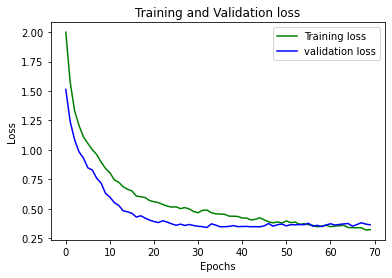

In \[19\]:

    epochs = range(nb_epochs)
    plt.plot(epochs, acc, 'g', label='Training accuracy')
    plt.plot(epochs, v, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

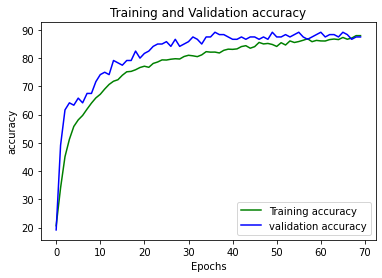

In \[20\]:

    def Final_test(dataloader,model,loss_fn):

    #     model in evaluation mode
        model.eval() 
        
        total = 0
        correct = 0
        running_loss = 0
        
        with torch.no_grad(): # gradients calculation not required
            
            for x,y in dataloader:
                
                output        = model(x.to(device)) #model's output.
                loss          = loss_fn(output,y.to(device)).item() #loss calculation.
                running_loss += loss
                
                total        += y.size(0)
                predictions   = output.argmax(dim=1).cpu().detach()
                correct      += (predictions == y.cpu().detach()).sum().item()
                
        avg_loss = running_loss/len(dataloader) #Average loss per batch.      
        val_acc = 100*(correct/total)
        print(f'test Loss = {avg_loss:.6f}',end='\t')
        print(f'Accuracy on test set = {100*(correct/total):.6f}% [{correct}/{total}]') #Prints the Accuracy.
        

Results on the training set

In \[21\]:

    Final_test(test_dl,model,loss_fn)

    test Loss = 0.336738   Accuracy on test set = 88.983051% [210/236]

In \[22\]:

    torch.save(model.state_dict(),'results/models/final_fold1.pth')

In \[23\]:

    from sklearn.metrics import confusion_matrix, classification_report

    nb_classes = 3

    # Initialize the prediction and label lists(tensors)
    predlist=torch.zeros(0,dtype=torch.long, device='cpu')
    lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

    with torch.no_grad():
        for i, (inputs, classes) in enumerate(test_dl):
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist=torch.cat([predlist,preds.view(-1).cpu()])
            lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

    # Confusion matrix
    cm=confusion_matrix(lbllist.numpy(), predlist.numpy())
    print(cm)

    # Per-class accuracy
    class_accuracy=100*cm.diagonal()/cm.sum(1)
    print(class_accuracy)

    print(classification_report(lbllist,predlist))

    [[138   1   0]
     [ 16  29   2]
     [  1   6  43]]
    [99.28057554 61.70212766 86.        ]
                  precision    recall  f1-score   support

               0       0.89      0.99      0.94       139
               1       0.81      0.62      0.70        47
               2       0.96      0.86      0.91        50

        accuracy                           0.89       236
       macro avg       0.88      0.82      0.85       236
    weighted avg       0.89      0.89      0.88       236

In \[24\]:

    def accuracy(confusion_matrix):
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        return (diagonal_sum / sum_of_all_elements )*100
    accuracy(cm)

Out\[24\]:

    88.98305084745762

In \[25\]:

    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    confusion_matrix = np.zeros((nb_classes, nb_classes))
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(test_dl):
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for t, p in zip(classes.view(-1), preds.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1

    plt.figure(figsize=(15,10))

    # class_names = list(label2class.values())
    class_names = ['DR 0','DR 1','DR 2']
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Out\[25\]:

    Text(0.5, 69.0, 'Predicted label')

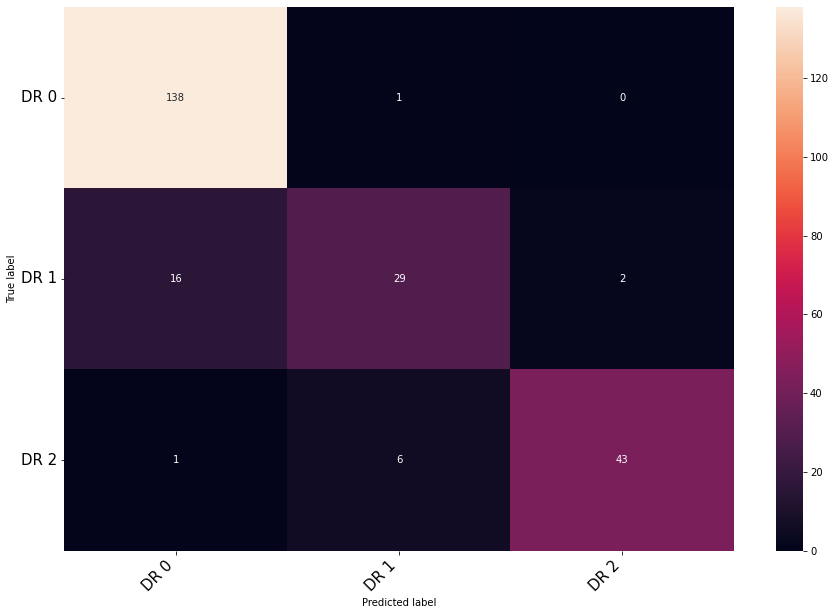

In \[26\]:

    !jupyter nbconvert --to html fold1.ipynb

    [NbConvertApp] Converting notebook fold1.ipynb to html
    [NbConvertApp] Writing 802326 bytes to fold1.html